# Setup

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/BobAIl/easyAI/src/easyAI')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/BobAIl/easyAI/src/easyAI


In [49]:
from network import Network
from layers import FCLayer, ActivationLayer, Conv2D, FlattenLayer, Dropout, BatchNormalization, MaxPooling, GlobalAvgPool2D
from activations import tanh, tanh_prime, leakyrelu, leakyrelu_prime, softmax, softmax_prime, softmax_prime_approx, relu, relu_prime
from lossfunction import mse, mse_prime, cross_entropy_loss, cross_entropy_loss_prime, categorical_hinge_loss, categorical_hinge_loss_prime, js_divergence, js_divergence_prime, kl_divergence, kl_divergence_prime

import random
random.seed(0)
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import time


# On se permet d'utiliser des biliothèques préexistantes pour les données et les tests
from keras.datasets import mnist, cifar10 #, cifar100
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# XOR test

In [50]:
# training data
x_train = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
y_train = np.array([[0],
                    [1],
                    [1],
                    [0]])

def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x: np.ndarray) -> np.ndarray:
    s = sigmoid(x)
    return s * (1 - s)

# network
net = Network()
net.add(FCLayer(2, 3, init_method="he"))
net.add(ActivationLayer(leakyrelu, leakyrelu_prime))
net.add(FCLayer(3, 3, init_method="he"))
net.add(ActivationLayer(leakyrelu, leakyrelu_prime))
net.add(FCLayer(3, 1, init_method="he"))
# net.add(ActivationLayer(sigmoid, sigmoid_prime))

# before training
out = net.predict(x_train)
print(out)

# training
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=100, learning_rate=0.1)

# test
out = net.predict(x_train)
print(out)

[array([-0.22668906]), array([-0.80551903]), array([-0.21662226]), array([-0.86283048])]
epoch 1/100              error=1.267666
epoch 2/100              error=0.348860
epoch 3/100              error=0.262179
epoch 4/100              error=0.272150
epoch 5/100              error=0.278805
epoch 6/100              error=0.274640
epoch 7/100              error=0.266664
epoch 8/100              error=0.260277
epoch 9/100              error=0.257174
epoch 10/100              error=0.256407
epoch 11/100              error=0.256485
epoch 12/100              error=0.256754
epoch 13/100              error=0.256823
epoch 14/100              error=0.256661
epoch 15/100              error=0.256394
epoch 16/100              error=0.256145
epoch 17/100              error=0.255973
epoch 18/100              error=0.255880
epoch 19/100              error=0.255833
epoch 20/100              error=0.255809
epoch 21/100              error=0.255791
epoch 22/100              error=0.255775
epoch 23/100      

# Mnist / Cifar-10 setup

In [51]:
test = "cifar-10"
(x_train, y_train), (x_test, y_test) = mnist.load_data() if test=="mnist" else cifar10.load_data()

"""
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()
"""

t = randrange(0, 1)
x_test = x_test[t:t+1000]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])  if test=="mnist" else x_test.transpose(0, 3, 1, 2)
x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test[t:t+1000], num_classes=10)

In [52]:
"""
    Xavier/Glorot Initialization: None, hyperbolic Tan (tanh), Logistic(sigmoid), softmax.
    he Initialization: Rectified Linear activation unit (ReLU) and variants.
"""

net = Network()
net.add(Conv2D(input_shape=(3,32,32), num_filters=32, filter_size=3, stride=1, padding=1, init_method="he"))
net.add(BatchNormalization(input_size=(32,32,32)))
net.add(ActivationLayer(relu, relu_prime))
net.add(MaxPooling(pool_size=2, stride=2))

net.add(Conv2D(input_shape=(32,16,16), num_filters=16, filter_size=3, stride=1, padding=1, init_method="he"))
net.add(BatchNormalization(input_size=(16,16,16)))
net.add(ActivationLayer(relu, relu_prime))

net.add(Conv2D(input_shape=(16,16,16), num_filters=16, filter_size=3, stride=1, padding=1, init_method="he"))
net.add(BatchNormalization(input_size=(16,16,16)))
net.add(ActivationLayer(relu, relu_prime))
net.add(MaxPooling(pool_size=2, stride=2))

net.add(FlattenLayer())
net.add(FCLayer(16*8*8, 512, init_method="he"))
net.add(BatchNormalization(input_size=512))
net.add(ActivationLayer(relu, relu_prime))
net.add(Dropout(dropout_rate=0.1))

net.add(FCLayer(512, 128, init_method="he"))
net.add(BatchNormalization(input_size=128))
net.add(ActivationLayer(relu, relu_prime))

net.add(FCLayer(128, 10, init_method="he"))
net.add(ActivationLayer(softmax, softmax_prime_approx))

net.use(cross_entropy_loss, cross_entropy_loss_prime)

Evaluation du modèle avant entraînement :
Accuracy: 10.90%
Precision: 0.01
Recall: 0.11
F1 Score: 0.02


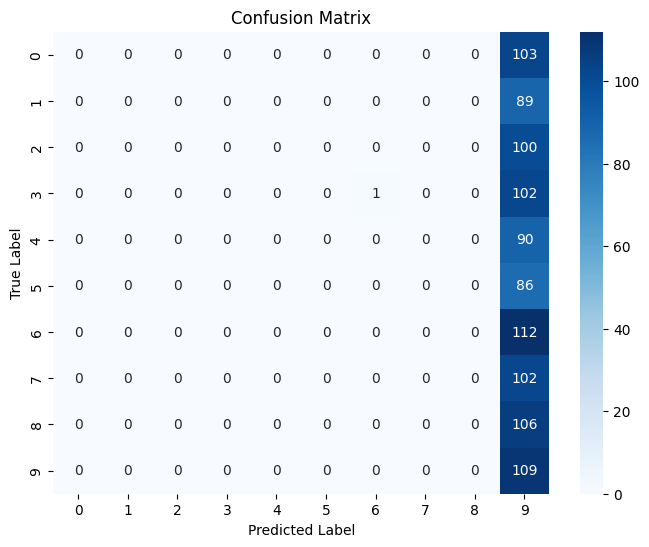

[array([0.01250683, 0.03585944, 0.04151363, 0.01793502, 0.00238803,
       0.00418282, 0.12491974, 0.00762313, 0.00592679, 0.74714458]), array([3.27663367e-03, 2.90904430e-02, 1.48282527e-02, 1.24601026e-03,
       2.19777258e-04, 1.77408943e-03, 4.80991731e-02, 1.09126771e-03,
       1.52877723e-03, 8.98845576e-01]), array([0.00891076, 0.02869834, 0.01096796, 0.00327589, 0.00331494,
       0.00592865, 0.06423323, 0.00358776, 0.00472448, 0.86635798])]


In [53]:
def evaluate_model(net, x_test, y_test):
    """
    Évalue les performances du modèle en affichant une matrice de confusion et des métriques classiques.

    :param net: Réseau de neurones entraîné avec une méthode predict(x_test).
    :param x_test: Données d'entrée pour le test.
    :param y_test: Labels réels sous forme one-hot.
    """
    # Prédictions du réseau
    test = net.predict(x_test)
    preds = np.argmax(test, axis=1)
    solutions = np.argmax(y_test, axis=1)

    # Calcul des métriques
    accuracy = accuracy_score(solutions, preds) * 100
    precision = precision_score(solutions, preds, average='weighted', zero_division=0)
    recall = recall_score(solutions, preds, average='weighted', zero_division=0)
    f1 = f1_score(solutions, preds, average='weighted', zero_division=0)

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Matrice de confusion
    cm = confusion_matrix(solutions, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(solutions), yticklabels=np.unique(solutions))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

print("Evaluation du modèle avant entraînement :")
evaluate_model(net, x_test, y_test)
print(net.predict(x_test[:3]))

# Training

Epoch 1/50 - train_error=2.784247 - val_error=3.641857
Epoch 2/50 - train_error=1.519946 - val_error=3.978783
Epoch 3/50 - train_error=0.836720 - val_error=4.623275
Nouveau learning rate : 5.0e-04
Epoch 4/50 - train_error=0.483475 - val_error=4.927874
Epoch 5/50 - train_error=0.401222 - val_error=5.113354
Nouveau learning rate : 2.5e-04
Epoch 6/50 - train_error=0.324105 - val_error=5.186127
Arrêt précoce après 6 époques (patience=5).
Model trained in  43.39419436454773 seconds
Evaluation du modèle sur ses données d'entraînement (max 10000):
Accuracy: 10.94%
Precision: 0.02
Recall: 0.11
F1 Score: 0.03


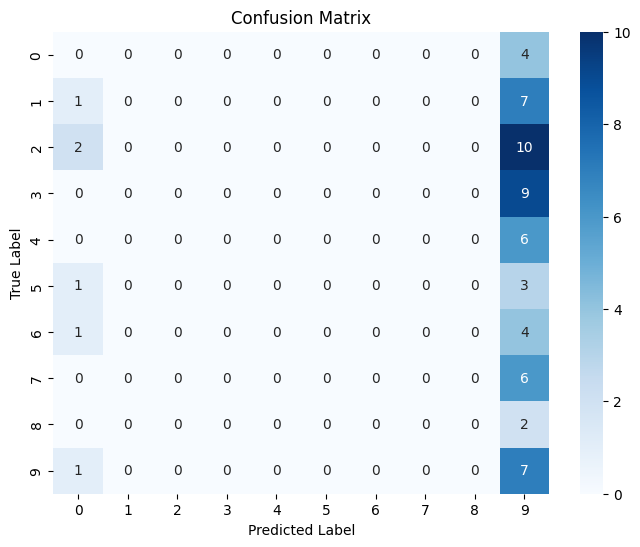

Evaluation du modèle sur des données de test :


In [ ]:
# Dans ce test, on essaye d'overfitter un batch.
for _ in range(1):
    t = randrange(0, 1)
    x_train_ = x_train[t:t+64]
    y_train_ = y_train[t:t+64]
    if test == "mnist":
        x_train_ = x_train_.reshape(x_train_.shape[0], 1, x_train_.shape[1], x_train_.shape[2])
    else:
        x_train_ = x_train_.transpose(0, 3, 1, 2)
    x_train_ = x_train_.astype('float32') / 255
    y_train_ = to_categorical(y_train[t:t+64], num_classes=10)
    timing = time.time()
    net.fit3(x_train_, y_train_, x_test, y_test, epochs=50, learning_rate=1e-3, batch_size=64, patience_lr_decay=2, patience_early_stopping=5, min_lr=1e-5)
    print("Model trained in ", time.time() - timing, "seconds")

print("Evaluation du modèle sur ses données d'entraînement (max 10000):")
evaluate_model(net, x_train_[:10000], y_train_[:10000])
print("Evaluation du modèle sur des données de test :")
evaluate_model(net, x_test, y_test)

# Test sur 3 exemples
out = net.predict(x_test[0:10])
preds = []
for prediction in out:
    normalized_pred = np.argmax(prediction)
    preds.append(normalized_pred)
print("Valeurs normalisées :", preds)
print("\nValeurs réelles :")
print([np.argmax(y) for y in y_test[0:10]])

# Results

In [ ]:
net.summary()
timing = time.time()
# Attention il faut avoir exécuté la cellule qui prétraite x_test sinon on a une erreur
output = net.predict(x_test[10:13])
inference_time = time.time() - timing
print(f"Output: {output}\nInference Time: {inference_time:.6f} seconds\nSolution: ", y_test[10:13])

net.save("Modele.pkl")

In [ ]:
def analyze_network(network):
    for i, layer in enumerate(network.layers):
        print(f"Layer {i} ({layer.__class__.__name__}):")

        if hasattr(layer, 'weights') and layer.weights is not None:
            min_w, max_w, mean_w = layer.weights.min(), layer.weights.max(), layer.weights.mean()
            near_zero_w = np.sum(np.abs(layer.weights) < 1e-5)
            total_params_w = layer.weights.size
            print(f"  Weights -> min: {min_w:.6f}, max: {max_w:.6f}, mean: {mean_w:.6f}, near_zero: {near_zero_w}, total: {total_params_w}")

            if hasattr(layer, 'm_weights') and hasattr(layer, 'v_weights'):
                min_m_hat = layer.m_weights.min()
                max_m_hat = layer.m_weights.max()
                mean_m_hat = layer.m_weights.mean()
                near_zero_m_hat = np.sum(np.abs(layer.m_weights) < 1e-5)

                min_v_hat = layer.v_weights.min()
                max_v_hat = layer.v_weights.max()
                mean_v_hat = layer.v_weights.mean()
                near_zero_v_hat = np.sum(np.abs(layer.v_weights) < 1e-5)

                print(f"    m_hat -> min: {min_m_hat:.6f}, max: {max_m_hat:.6f}, mean: {mean_m_hat:.6f}, near_zero: {near_zero_m_hat}")
                print(f"    v_hat -> min: {min_v_hat:.6f}, max: {max_v_hat:.6f}, mean: {mean_v_hat:.6f}, near_zero: {near_zero_v_hat}")

        if hasattr(layer, 'biases') and layer.biases is not None:
            min_b, max_b, mean_b = layer.biases.min(), layer.biases.max(), layer.biases.mean()
            near_zero_b = np.sum(np.abs(layer.biases) < 1e-5)
            total_params_b = layer.biases.size
            print(f"  Biases  -> min: {min_b:.6f}, max: {max_b:.6f}, mean: {mean_b:.6f}, near_zero: {near_zero_b}, total: {total_params_b}")

        print()


analyze_network(net)